# Exercise Sheet No. 5

---

> Machine Learning for Natural Sciences, Summer 2023, Jun.-Prof. Pascal Friederich, pascal.friederich@kit.edu
> 
> Deadline: May 22nd 2023, 8:00 am
>
> Container version 1.0.0
>
> Tutor: chen.zhou@kit.edu
>
> **Please ask questions in the forum/discussion board and only contact the Tutor when there are issues with the grading**
---

**Topic**: This exercise sheet will focus on Bayesian statistics, k-nearest neighbors and monte-carlo simulation.

Please add here your group members' names and student IDs. 

Names: Robin Maurer, Francisca Azocar Dannemann, Marcus Fledler

IDs: 2462304, 2480646, 2494460

# 5 Bayes' theorem

Here are Bayes rule and some important formulas of lecture 2.

$$\boxed{p(y|x) = \frac{p(x|y) p(y)}{p(x)} }$$

where $p(y|x)$ is the posterior, $p(x|y)$ the likelihood, $p(x)$ the evidence and $p(y)$ the prior. Here, $p(x\mid y)$ is a conditional probability, which gives the probability of event $x$ occurring given that $y$ is true. Marginalization over a variable e.g. $y$ ("eliminate variable $y$") is defined by:

$$p(x) = \sum\limits_k p(x|y{=}k) \; p(y{=}k)$$

Where k is each possible realization of y.

Note: You do not have to give a full proof as markdown. Assigning the value to e.g. `p_of_x` is enough.

Let us consider the following toy problem for the Naive Bayes classifier. The feature variable $X \in [0, 1]$ is real-valued and 1-dimensional, and the response of the system $Y \in \{0, 1\}$ is discrete with two classes $0$ and $1$. For the system only the prior probabilities and likelihoods (as density functions f) are known. They are given by

$$p(y = 0) = p(y = 1) = \frac{1}{2}$$

$$p(x\,|\,y = 0) =  2 - 2x$$

$$p(x\,|\,y = 1) = 2x$$

Now, calculate the probability density of $x$, i.e., $p(x)$ by marginalization over $y$. 

Hint: Marginalization with discrete variables is defined by $p(x) = \sum_y p(x|y) p(y)$

In [1]:
# Task 1: probability of x (1 point in total)
p_of_x = None # please assign a numeric value to p_of_x
# YOUR CODE HERE
p_of_x = 1
#raise NotImplementedError()

In [2]:
# Hidden test below (1 Point)
# The derivation is not graded, only the answer yields 1 Point
assert p_of_x or p_of_x == 0, 'Please assign a value to p_of_x!'
# Additional test for p(x)

Calculate the true posteriors $p^*(y|x)$ by using Bayes rule. Since $y$ is a discrete variable it is again enough to calculate the classes $\{0,1\}$ separatly 

$$p^*(y=0\,|\,x) = \frac{p(x\,|\,y = 0)\,p(y = 0)}{p(x)}$$
$$p^*(y=1\,|\,x) = \frac{p(x\,|\,y = 1)\,p(y = 1)}{p(x)}$$

The Naive Bayesian classifier would then be: "pick the highest probability class for given $x$". 

$$\hat{f}(x) = \underset{k}{\text{argmax}} \; p^*(y=k|x)$$

In [3]:
# Task 2: Calculate posterior (2 points in total)

import matplotlib.pyplot as plt
import numpy as np
# Give your solution as a function and plot it
def prob_y_x(y,x): # p*(y|x)
    """Calculate p(y) given x.
    Args:
        y (int): y value either 0 or 1.
        x (np.array): Array of x-values of shape (N,)
    Returns:
        prob (np.array): Probability p(y|x) with shape (N,)
    """
    prob = None # please update this in your solution
    # YOUR CODE HERE
    prior = 0.5
    evidence = 1

    if y ==1:
        likelihood = 2*x
        prob = likelihood*prior/evidence
    else:
        likelihood = 2-2*x
        prob = likelihood*prior/evidence
    #raise NotImplementedError()
    return prob

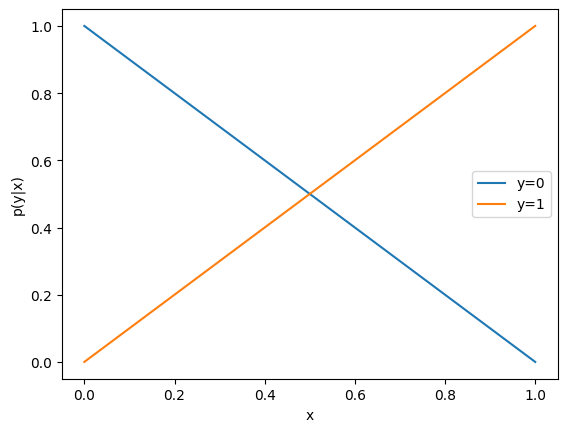

In [4]:
# plot the probability p(y|x) (ordinate) against x (abscissa) for y=0 and y=1
plt.figure()
sampling = np.linspace(0,1,100)
plt.plot(sampling, prob_y_x(0,sampling),label="y=0")
plt.plot(sampling, prob_y_x(1,sampling),label="y=1")
plt.legend()
plt.xlabel("x")
plt.ylabel('p(y|x)')
plt.show()

In [5]:
# (1 Point)
assert np.abs(prob_y_x(0,0.0) - 1.0 ) < 0.001

In [6]:
# Hidden tests below (1 point)
# Additional test for p (y|x) with y=0 or y=1

### 5.1 Bayes error rate

The Bayes error rate can be described by the probability of failure of the Bayes classifer $\mathbb{E}_{x\sim p(x)}[ p(\hat{y} {\ne} y^* |x)]$, where $\mathbb{E}$ denotes the expectation value, defined by $\mathbb{E}_{x\sim p(x)}[f(x)] = f(x) \; p(x) \; dx$. The probability of error can also be defined by $p(\text{error}) = 1- p(\text{success}) = 1 - \mathbb{E}_{x\sim p(x)}[p(\hat{y}_i=y_i^*|x)]$, which gives:

$$\mathbb{E}_{x\sim p(x)}[p(\hat{y} {\ne} y^* |x)] = 1 - \int (\underset{k}{\text{max}}\; p(y{=}k|x)) \;  p(x) \, dx$$

Determine the error rate for the toy problem, i.e. the best achievable error for Bayes classifer, using the above formular. In this case this is equal to a threshold classifier that picks either $y \in \{0,1\}$ depending whether $x$ is smaller or bigger than a threshold $x_t = 1/2$. 

\begin{equation}
\text{threshold classifier:} \;\;\; \hat{y} = \begin{cases}
0, & \text{if}\; x<x_t\\
1, & \text{if}\; x \geq x_t
\end{cases}
\end{equation}

Bonus: If you want you can prove that $x_t = 1/2$ is the best choice of a threshold (not graded).

In [7]:
# Task 3: Bayes error rate (1 point in total)

error_bayes = None # error rate not in % but [0,1]
# YOUR CODE HERE

# Kontrolle: zu viel mathe zum durchlesen ohne Ritalin lol, antwort aus oberer grafik (alex)
# Kontrolle: hier noch bissle code (alex)
# x_t = 1/2  # Threshold
# p_x = 1  # Assuming uniform distribution for simplicity
# p_y_0 = 1 - x_t  # Probability of y=0 for x < x_t
# p_y_1 = x_t  # Probability of y=1 for x >= x_t
# error = 1 - max(p_y_0, p_y_1) * p_x
# print(error)
error_bayes = 0.25

#raise NotImplementedError()

In [8]:
# Hidden tests below (1 Point)
# The derivation is not graded, only the answer yields 2 Points
assert isinstance(error_bayes, float) 

### 5.2 Nearest Neighbour error rate

The nearest-neighbor classiffier's asymptotic local error ($N \to \infty$) is given by the Gini impurity for 1-NN and based on Bayes classification (without proof):

$$ p_\infty(\text{error}|x) = 1-\sum_k p(y=k|x)^2$$

And for the asymptotic overall error

$$ P_\infty(\text{error}) = \int p_{\infty}(\text{error}\,|\,x)\,p(x)\,dx =\int \left(1-\sum_k p(y=k|x)^2 \right) \,p(x)\,dx$$

Determine the error rate for the toy problem, i.e. the best achievable error for Nearest Neighbour classifer, using the above formular.

In [9]:
#Kontrolle: Integralrechnung, unsicher ob richtig
# Task 4: Nearest Neighbour error rate (1 point in total)

error_NN = None  # error rate not in % but [0,1]
# YOUR CODE HERE

error_NN = 1/3
#print(error_NN)

#raise NotImplementedError()

In [10]:
# Hidden test below (1 Point)
# The derivation is not graded, only the answer yields 1 Point
assert isinstance(error_NN, float)

### 5.3 Error rate for constant classifier

At last, determine the error rate for our toy problem for a classifier that knows nothing about $x$, or more specifically the randomly guesses $y$ or always picks for example $y=1$ .

In [11]:
# Task 5: Constant Classifier error rate (1 point in total)

error_guess = None # error rate not in % but [0,1]
# YOUR CODE HERE

# Frage: warum ist alles 0.5? Wegen der p(y==0)=p(y==1)=0.5 (alex)
error_guess = 0.5

#raise NotImplementedError()

In [12]:
# Hidden test below (1 Point)
# The derivation is not graded, only the answer yields 1 Point
assert isinstance(error_guess, float)

# 5.4 Monte-Carlo

To test the above theoretically derived error rates, we can use a random number generator to produce data. Specifically, one first samples an instance label $Y$ according to the prior probabilities, and then uses the
corresponding likelihood to sample the feature $X$. If no predefined random generator for the desired
likelihood is available (as is the case here), uniformly distributed samples from a standard random
number generator can be transformed to the desired distribution by means of "inverse transform
sampling" (see https://en.wikipedia.org/wiki/Inverse_transform_sampling). You do not have to do this here (we give the solution below), however, you are encouraged to read about it.

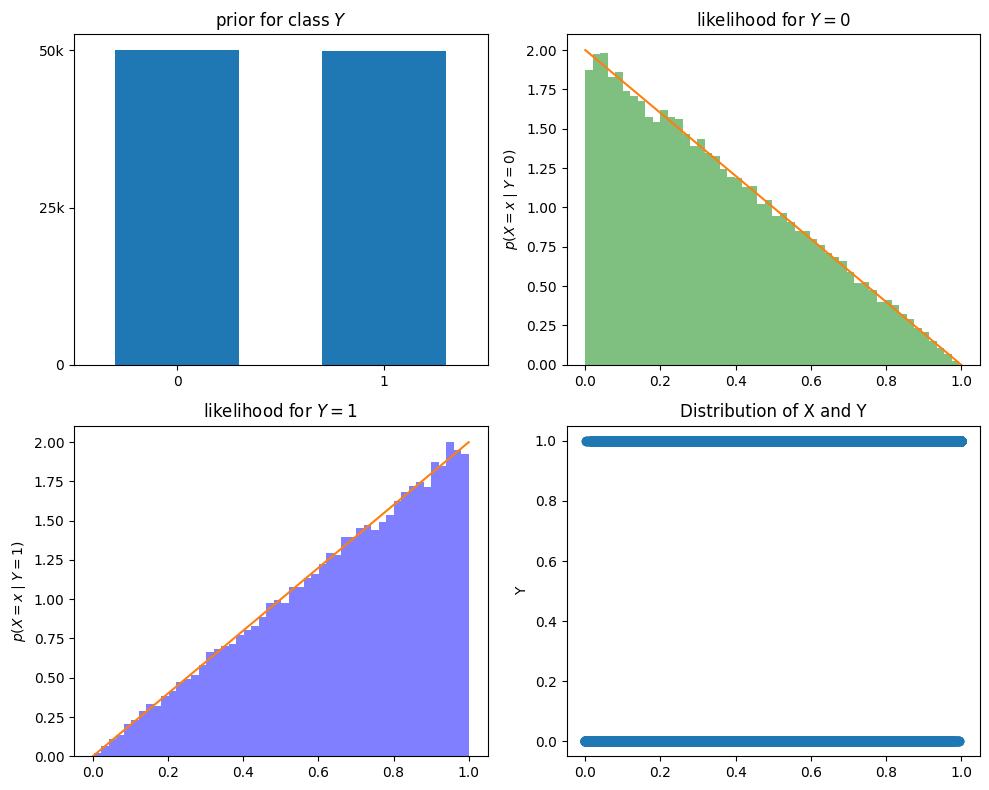

In [13]:
# Make data
def create_data(N,seed=0):
    np.random.seed(seed)
    data = np.zeros((N, 2), dtype = float)
    for i in range(N):
        # sample y uniformly between 0 and 1
        y = np.random.randint(2)
        # use inverse transform sampling for x, given y
        u = np.random.rand()
        if 0 == y:
            x = 1 - np.sqrt(1 - u)
        else:
            x = np.sqrt(u)
        data[i,:] = (x,y)
    return data

# Generate Data
test_data = create_data(100000)
X_0 = test_data[test_data[:,1] == 0][:,0]
X_1 = test_data[test_data[:,1] == 1][:,0]

# show prior and likelihoods for both classes as bar chart and histograms
fig = plt.figure(figsize = (10, 8))

plt.subplot(221)
plt.title(r'prior for class $Y$')
plt.bar([0, 1], [X_0.size, X_1.size], width = 0.6)
plt.xticks([0,1]); plt.xlim([-0.5, 1.5]); plt.yticks([0,25000,50000], ['0', '25k', '50k'])

plt.subplot(222)
plt.title(r'likelihood for $Y = 0$')
plt.hist(X_0, 50, density = True, facecolor = 'green', alpha = 0.5)
plt.ylabel(r'$p(X = x \mid Y = 0)$')
plt.plot([0,1], [2,0])

plt.subplot(223)
plt.title(r'likelihood for $Y = 1$')
plt.hist(X_1, 50, density = True, facecolor = 'blue', alpha = 0.5)
plt.ylabel(r'$p(X = x \mid Y = 1)$')
plt.plot([0,1], [0,2])

plt.subplot(224)
plt.title('Distribution of X and Y')
plt.scatter(test_data[:, 0], test_data[:, 1])
plt.ylabel('Y')

fig.tight_layout(); plt.show()

### 5.5 Classifier Error rates

Now determine "experimentally" the error rates for the following classifiers using the random number generation of `create_data()` for the toy problem:

* A) Threshold classifier with threshold $x_t$ (for $x_t = 1/2$ this equals Naive Bayes classifier):

$$ f_A (x) =  \begin{cases}
	0 &\text{if} \;\;x < x_t \\
	1 & \text{if} \;\;x \geqslant x_t
	\end{cases}$$
  

* B) Constant classifier:

$$ f_B(x) = 1$$

* C) Random classifier:

$$ f_C(x) =  \begin{cases}
	0 & \; \text{with probability} 1/2\\
	1 &  \;\text{otherwise}
	\end{cases}$$
    
* D) Nearest Neighbour classifier (k=1) for a training set $(x_i, y_i) \in TS$ that is taken from the data above.

$$ \hat{y} = f_D(x;\text{TS}) = y_{\hat{i}}^*$$

$$\hat{i} = \underset{i}{\text{argmin}}\; d(x_i,x)$$


In [14]:
# Task 6: Simple classifiers (6 points in total)

# implement the classifiers' functions below:
def pred_A(x,xt):
    """Classifier A.
    Args:
        x (np.array): Array of x-values of shape (N,)
        xt (float): Threshold in (0,1)
    Returns:
        label (np.array): Label for x of shape (N,)
    """
    label = None # please update this in your solution
    # YOUR CODE HERE
    
    label = np.where(x<xt,0,1)
    
    #raise NotImplementedError()
    return label

def pred_B(x):
    """Classifier B.
    Args:
        x (np.array): Array of x-values of shape (N,)
    Returns:
        label (np.array): Label for x of shape (N,)
    """
    label = None # please update this in your solution
    # YOUR CODE HERE
    
    label = [1 for i in range(x.shape[0])]
    
    #raise NotImplementedError()
    return label

def pred_C(x):
    """Classifier C.
    Args:
        x (np.array): Array of x-values of shape (N,)
    Returns:
        label (np.array): Label for x of shape (N,)
    """
    label = None # please update this in your solution
    # YOUR CODE HERE

    rand = [np.random.random() for _ in x]
    label = [0 if rand <0.5 else 1 for rand in rand]

    #raise NotImplementedError()
    return label

# Determine the error rates
def ErrorCount(y_pred, y_true):
    CountError = np.array(np.rint(y_true), dtype="int") != np.array(np.rint(y_pred),dtype="int")
    CountError = np.sum(CountError)
    return CountError/len(y_true)

In [15]:
# Now determine the error rates with std deviation, i.e. create_data(N=100000) for 5 repetitions
dat_mult = [create_data(N=100000,seed=i) for i in range(5)]

# For A choose here xt = 0.5
# error_A, error_B, error_C are mean values of prediction error rates on the 5 datasets in dat_mult.
# error_A_std, error_B_std, error_C_std are corresponding standard deviations.
# please implement the calculation in your solution
# use the ErrorCount() function to determine the error rate
error_A = None
error_A_std = None
error_B = None
error_B_std = None
error_C = None
error_C_std = None

# YOUR CODE HERE
errors_A,errors_B,errors_C = [],[],[]
for data in dat_mult:
    x = data[:, 0]
    y = data[:, 1]
    y_pred_A = pred_A(x,0.5)
    y_pred_B = pred_B(x)
    y_pred_C = pred_C(x)
    errors_A.append(ErrorCount(y_pred_A, y))
    errors_B.append(ErrorCount(y_pred_B, y))
    errors_C.append(ErrorCount(y_pred_C, y))
    
error_A_std = np.std(errors_A)
error_B_std = np.std(errors_B)
error_C_std = np.std(errors_C)

error_A = np.mean(errors_A)
error_B = np.mean(errors_B)
error_C = np.mean(errors_C)

#raise NotImplementedError()

**Hint:** Compare your error rate of classifier A with your answer of Task 3: Bayes error rate, and rate of calssifier B/C with the answer of Task 5: Constant Classifier error rate. You should get an idea if your implementation is correct.

In [16]:
print("Error Rate A: {} ± {}".format(error_A,error_A_std))
print("Error Rate B: {} ± {}".format(error_B,error_B_std))
print("Error Rate C: {} ± {}".format(error_C,error_C_std))

Error Rate A: 0.251052 ± 0.0014075425393216385
Error Rate B: 0.500178 ± 0.0005921959135286205
Error Rate C: 0.5011019999999999 ± 0.0015348407083472938


In [17]:
# Hidden tests below (2 Points)
# Try to assign a single value to the error rates
# We will also check the function implementations
assert error_A is not None

In [18]:
# Hidden tests below (2 Points)
assert error_B is not None

In [19]:
# Hidden tests below (2 Points)
assert error_C is not None

In [20]:
# Task 7: NN classifier (4 points in total)

# Tipp: Use the distance function from exercise sheet 3! Or scipy cdist.

def nn_classifier(x_test, TS):
    """Nearest neighbor classifier for arbitrary training-set size.
    Use vectorization (ideally).
    
    Args:
        x_test (np.array): data to predict of shape (N,)
        TS (np.array): Training dataset of shape (N,2) with (x,y) in the last dimension.
    
    Returns:
        y_pred (np.array): Prediction of the NN classifier of shape (N,) with dtype=np.int
    """  
    y_pred = None # please update this in your solution
    # YOUR CODE HERE
    
    from scipy.spatial.distance import cdist

    distances = cdist(x_test.reshape(-1, 1), TS[:, 0].reshape(-1, 1), metric='euclidean')
    nn_index = np.argmin(distances, axis=1)
    y_pred = TS[nn_index, 1].astype(int)
    #raise NotImplementedError()
    return y_pred

In [21]:
dat_mult = [create_data(N=100000,seed=i) for i in range(5)] # For training
test_mult = [create_data(N=100,seed=i+100) for i in range(5)] # For testing

# please implementation the calculation in your solution
# use the ErrorCount() function to determine the error rate
# error_NN is the mean value of prediction error rates on the 5 datasets in test_mult.
# error_NN_std is the corresponding standard deviation.
error_NN = None
error_NN_std = None

# YOUR CODE HERE

errors_NN = []
for i in range(len(test_mult)):
    x_test = test_mult[i][:, 0]
    y_test = test_mult[i][:, 1]
    y_pred = nn_classifier(x_test, dat_mult[i])
    errors_NN.append(ErrorCount(y_pred, y_test))

error_NN_std = np.std(errors_NN)
error_NN = np.mean(errors_NN)

#raise NotImplementedError()

**Hint:** Compare your error rate of NN classifier with your answer of Task 4: Nearest Neighbour error rate. You should get an idea if your implementation is correct.

In [22]:
print("Error Rate D: {} ± {}".format(error_NN,error_NN_std))

Error Rate D: 0.34400000000000003 ± 0.034409301068170514


In [23]:
# (2 Points)
assert error_NN is not None
assert error_NN_std is not None
# Hidden test below
# will check the value of error_NN and error_NN_std

In [24]:
# (2 Points)
assert nn_classifier(np.array([[0.0]]), np.array([[0.0,0.0]])) is not None

# Hidden test below
# We will also test the function nn_classifier(x_test, TS)

Now, let's evaluate the error rate as a function of the dataset size and plot it.
The datasets we are working on here are included in `dat_grid`. The size of the datasets are $50$, $100$, $1000$, $10000$ and $100000$, with each size contains $5$ datasets randomly generated by `create_data()`.

In [25]:
dat_grid = [[create_data(N=n,seed=i) for i in range(5)] for n in [50,100,1000,10000,100000]]

Please use `pred_A()`, `pred_B()`, `pred_C()` that you have already implemented earlier to classify the datasets and calculate means/standard deviations of the errors.

In [26]:
# Task 8: Different Dataset Size (3 points in total)

# Evaluate the error rate for the 3 rules as above with different sizes in dat_grid.
# error_grid_a, error_grid_b, error_grid_c are mean values of prediction error rates.
# error_grid_a_std, error_grid_b_std, error_grid_c_std are corresponding standard deviations.
# Please finish the calculation with the ErrorCount(), pred_A(), pred_B(), and pred_C() functions in your solution.
error_grid_a = None
error_grid_a_std = None
error_grid_b = None
error_grid_b_std = None
error_grid_c = None
error_grid_c_std = None

# YOUR CODE HERE

error_grid_a, error_grid_a_std, error_grid_b, error_grid_b_std, error_grid_c, error_grid_c_std = [], [], [], [], [], []

for dataset in dat_grid:
    errors_A,errors_B,errors_C = [],[],[]
    for data in dataset:
        x = data[:, 0]
        y = data[:, 1]
        y_pred_A = pred_A(x,0.5)
        y_pred_B = pred_B(x)
        y_pred_C = pred_C(x)
        errors_A.append(ErrorCount(y_pred_A, y))
        errors_B.append(ErrorCount(y_pred_B, y))
        errors_C.append(ErrorCount(y_pred_C, y))
        
    error_grid_a_std.append(np.std(errors_A))
    error_grid_b_std.append(np.std(errors_B))
    error_grid_c_std.append(np.std(errors_C))

    error_grid_a.append(np.mean(errors_A))
    error_grid_b.append(np.mean(errors_B))
    error_grid_c.append(np.mean(errors_C))

#raise NotImplementedError()

In [27]:
# (2 points)
assert len(error_grid_a) == 5 and len(error_grid_b_std) == 5

# Hidden tests below
# Values of means/standard deviations of errors will be tested

For Nearest Neighbour classifier, we will use `dat_grid` as training sets and generate test sets as `test_grid_nn`. The size of the test sets are $5$, $10$, $100$, $100$, $1000$ with each size consists of $5$ datasets.

In [28]:
# for nearest neighbour simply pick the separate test_grid_nn
test_grid_nn = [[create_data(N=n,seed=i+100) for i in range(5)] for n in [5,10,100,100,1000]]

# Evaluate the error rate for the Nearest Neighbour classifier trained with dat_grid and tested on test_grid_nn.
# error_grid_d contains mean values of prediction error rates.
# error_grid_d_std contains corresponding standard deviations.
# Please finish the calculation with the ErrorCount() and nn_classifier() functions in your solution.
error_grid_d = None
error_grid_d_std = None

# YOUR CODE HERE

error_grid_d, error_grid_d_std = [], []
for dataset in test_grid_nn:
    errors_NN = []
    for i in range(len(dataset)):
        x_test = test_mult[i][:, 0]
        y_test = test_mult[i][:, 1]
        y_pred = nn_classifier(x_test, dat_mult[i])
        errors_NN.append(ErrorCount(y_pred, y_test))

    error_grid_d_std.append(np.std(errors_NN))
    error_grid_d.append(np.mean(errors_NN))

#raise NotImplementedError()

In [29]:
# (1 point)
assert len(error_grid_d) == 5 and len(error_grid_d_std) == 5

# Hidden tests below
# Values of means/standard deviations of errors will be tested

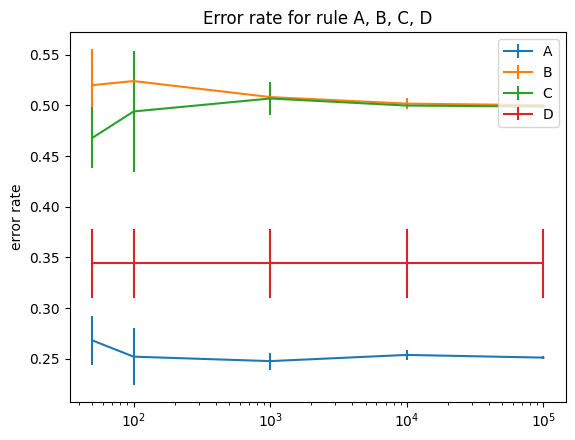

In [30]:
#Plot results
plt.figure()
plt.title(r'Error rate for rule A, B, C, D')
# plt.errorbar
sampling = np.array([n for n in [50,100,1000,10000,100000]])
plt.errorbar(sampling,np.array(error_grid_a), yerr=np.array(error_grid_a_std),label="A")
plt.errorbar(sampling,np.array(error_grid_b), yerr=np.array(error_grid_b_std),label="B")
plt.errorbar(sampling,np.array(error_grid_c), yerr=np.array(error_grid_c_std),label="C")
plt.errorbar(sampling,np.array(error_grid_d), yerr=np.array(error_grid_d_std),label="D")
plt.ylabel('error rate')
plt.legend(loc="upper right")
plt.xscale('log')

Congragulation! You have finished this exercise. I hope it is helpful to understand lecture content. Don't forget to participate the exercise survey and thanks again for your work!